# Part B

## Problem 1

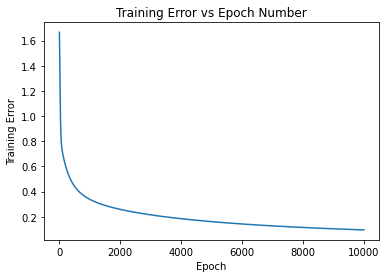

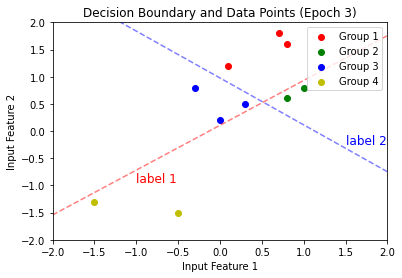

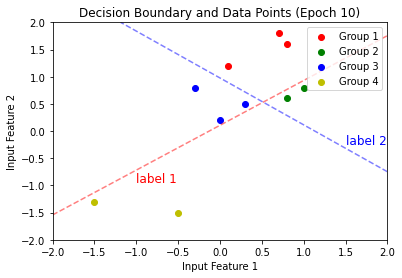

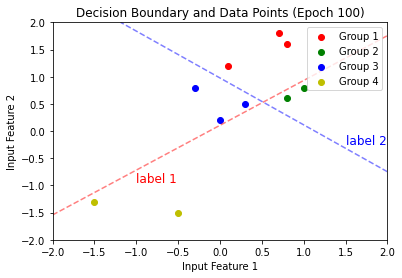

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize the network's parameters
np.random.seed(0)  # For reproducibility
input_size = 2
output_size = 2
learning_rate = 0.05
epochs = 10000

# Define the input matrix and target matrix
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Initialize weights and biases
weights = np.random.rand(input_size, output_size)
biases = np.random.rand(1, output_size)

# Initialize error history
error_history = []

# Model Training
for epoch in range(epochs):
    total_error = 0

    for i in range(X.shape[1]):
        # Forward pass
        Z = np.dot(X[:, i], weights) + biases
        Y_pred = sigmoid(Z)

        # Calculate the error
        error = 0.5*np.mean(np.power(Y_pred-Y[:, i], 2))
        total_error += error
        
        # Backpropagation
        delta_ypred = (Y_pred-Y[:,i])/Y[:,i].size
        dZ = delta_ypred * sigmoid_derivative(Z)
        dW = np.dot(X[:, i].reshape(-1,1), dZ)
        dB = dZ

        # Update weights and biases
        weights -= learning_rate * dW
        biases -= learning_rate * dB

    # Append the total error to the history
    error_history.append(total_error)

# Plot training error vs epoch number
plt.figure(1)
plt.plot(range(epochs), error_history)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs Epoch Number')

# Plot decision boundary and data points for different epochs
for epoch in [3, 10, 100]:
    plt.figure(epoch)
    plt.scatter(X[0, :3], X[1, :3], c='r', marker='o', label='Group 1')
    plt.scatter(X[0, 3:5], X[1, 3:5], c='g', marker='o', label='Group 2')
    plt.scatter(X[0, 5:8], X[1, 5:8], c='b', marker='o', label='Group 3')
    plt.scatter(X[0, 8:], X[1, 8:], c='y', marker='o', label='Group 4')
    
    # Create a mesh grid to plot the decision boundary
    x1_range = np.linspace(-2, 2, 100)
    x2_range = np.linspace(-2, 2, 100)
    X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
    datas = np.vstack([X1_mesh.ravel(), X2_mesh.ravel()])
    Y_mesh = np.zeros(datas.shape)
    for i in range(datas.shape[1]):
        Y_mesh[:,i] = sigmoid(np.dot(datas[:,i],weights) + biases)
    Y1_mesh = Y_mesh[0].reshape(X1_mesh.shape)
    Y2_mesh = Y_mesh[1].reshape(X1_mesh.shape)
    # Draw contour lines for decision boundaries
    plt.contour(X1_mesh, X2_mesh, Y1_mesh, levels=[0.5], colors='red', linestyles='dashed', alpha=0.5)
    plt.contour(X1_mesh, X2_mesh, Y2_mesh, levels=[0.5], colors='blue', linestyles='dashed', alpha=0.5)
    # Annotate the decision boundary lines with labels
    plt.text(-1.0, -1.0, 'label 1', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
    plt.text(1.5, -0.3, 'label 2', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.title(f'Decision Boundary and Data Points (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 2

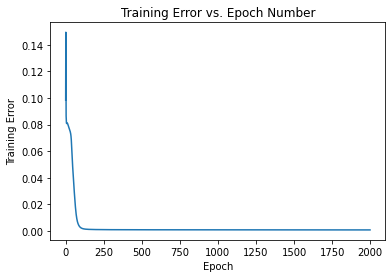

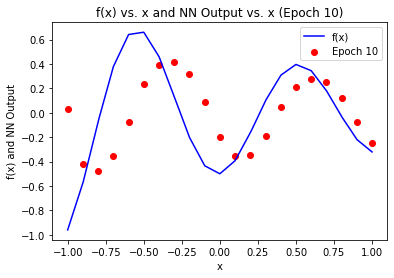

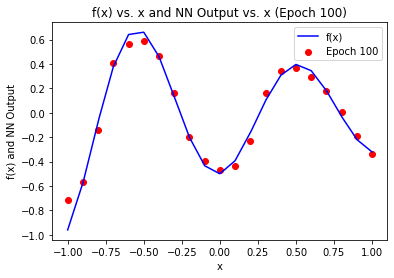

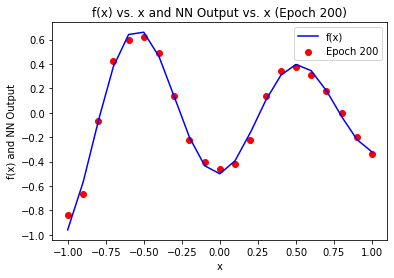

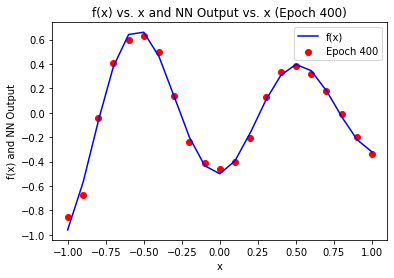

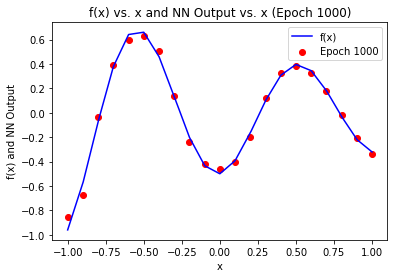

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the tanh activation function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2


# Define the architecture of the neural network
np.random.seed(0)  # For reproducibility
input_size = 1
hidden_1 = 32
hidden_2 = 8
output_size = 1

# Initialize weights and biases
# W1 = np.random.rand(input_size, hidden_1)-1
# B1 = np.random.rand(1,hidden_1)
# W2 = np.random.rand(hidden_1, hidden_2)-1
# B2 = np.random.rand(1,hidden_2)
# W3 = np.random.rand(hidden_2, output_size)-1
# B3 = np.random.rand(1,output_size)

W1 = np.random.uniform(-1, 1, (input_size, hidden_1))
B1 = np.random.rand(1,hidden_1)-0.5
W2 = np.random.uniform(-1, 1, (hidden_1, hidden_2))
B2 = np.random.rand(1,hidden_2)-0.5
W3 = np.random.uniform(-1, 1, (hidden_2, output_size))
B3 = np.random.rand(1,output_size)-0.5


# Define hyperparameters
lr = 0.05
epochs = 2000
epoch_list = [10, 100, 200, 400, 1000]

# Define the input and target data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

# Lists to store training errors and network outputs for different epochs
training_errors = []
network_outputs = {}
for epoch in range(epochs):
    network_output = []
    total_error = 0
    for i in range(len(X)):
        # Forward pass

        input_layer = X[i]
        hidden1 = tanh(np.dot(input_layer, W1) + B1)
        hidden2 = tanh(np.dot(hidden1, W2) + B2)
        y_pred = tanh(np.dot(hidden2, W3) + B3)

        # Compute error
        error = 0.5*np.mean(np.power(y_pred-Y[i], 2))
        total_error += error
        network_output.append(y_pred)

        # Backpropagation
        delta_ypred = (y_pred-Y[i])/Y[i].size
        delta_output = delta_ypred * tanh_derivative(np.dot(hidden2, W3) + B3)
        delta_hidden2 = np.dot(delta_output, W3.T) * tanh_derivative(np.dot(hidden1, W2) + B2)
        delta_hidden1 = np.dot(delta_hidden2, W2.T) * tanh_derivative(np.dot(input_layer, W1) + B1)
        delta_input = np.dot(delta_hidden1, W1.T) * tanh_derivative(input_layer)

        W3 -= lr * np.dot(hidden2.T, delta_output)
        B3 -= lr * delta_output
        
        W2 -= lr * np.dot(hidden1.T, delta_hidden2)
        B2 -= lr * delta_hidden2

        W1 -= lr * np.dot(input_layer.T, delta_hidden1)
        B1 -= lr * delta_hidden1
    
    training_errors.append(total_error/len(X))
    if epoch in epoch_list:
        network_outputs[epoch] = network_output

# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(epochs), training_errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')

# Plot the actual function f(x) and network output vs. x for different epochs
x_values = np.linspace(-1, 1, 1000)
actual_function = [np.interp(x, X, Y) for x in x_values]
for epoch in [10, 100, 200, 400, 1000]:
    plt.figure(epoch)
    plt.plot(x_values, actual_function, c='b', label='f(x)')
    plt.scatter(X, network_outputs[epoch], c='r', marker='o', label=f'Epoch {epoch}')
    
    plt.xlabel('x')
    plt.ylabel('f(x) and NN Output')
    plt.title(f'f(x) vs. x and NN Output vs. x (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 2 another way

In [3]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
    
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2


def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        errors = []
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
#             print('epoch %d/%d   error=%f' % (i+1, epochs, err))
            errors.append(err)
        return errors


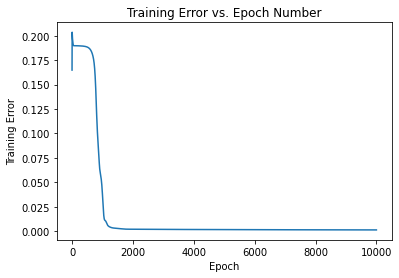

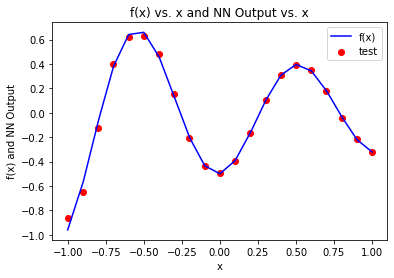

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from Network import Network
# from fc_layer import FCLayer
# from activation_layer import ActivationLayer
# from activations import tanh, tanh_prime
# from losses import mse, mse_prime

# training data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

# network
np.random.seed(0)  # For reproducibility
net = Network()
net.add(FCLayer(1, 32))
net.add(ActivationLayer(tanh, tanh_derivative))
net.add(FCLayer(32, 8))
net.add(ActivationLayer(tanh, tanh_derivative))
net.add(FCLayer(8, 1))
net.add(ActivationLayer(tanh, tanh_derivative))

# train
net.use(mse,mse_prime)
errors =net.fit(X,Y, epochs=10000, learning_rate=0.05)

# test
out = net.predict(X)
# print(out)


# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(10000), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')

# Plot the actual function f(x) and network output vs. x for different epochs
x_values = np.linspace(-1, 1, 10000)
actual_function = [np.interp(x, X, Y) for x in x_values]

plt.figure()
plt.plot(x_values, actual_function, c='b', label='f(x)')
plt.scatter(X, out, c='r', marker='o', label=f'test')

plt.xlabel('x')
plt.ylabel('f(x) and NN Output')
plt.title(f'f(x) vs. x and NN Output vs. x')
plt.legend()

plt.show()

## Problem 3

/tmp/ipykernel_171578/1447723821.py:7: RuntimeWarning: overflow encountered in exp
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))
/tmp/ipykernel_171578/1447723821.py:7: RuntimeWarning: invalid value encountered in divide
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))


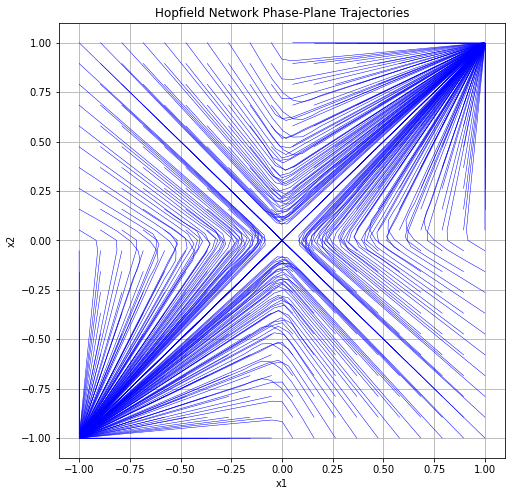

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the differential equation for the Hopfield network
def hopfield_network(t, x):
    W = np.array([[0, 1], [1, 0]])
    b = np.array([0, 0])
    dxdt = -0.5 * x + 0.5 * np.dot(W, sigmoid(x)) + 0.5 * b
    return dxdt

# Create a grid of initial conditions
x1_range = np.linspace(-1, 1, 20)
x2_range = np.linspace(-1, 1, 20)
initial_conditions = [(x1, x2) for x1 in x1_range for x2 in x2_range]

# Time span for integration
t_span = (0, 10)

# Plot phase-plane trajectories for each initial condition
plt.figure(figsize=(8, 8))
for initial_condition in initial_conditions:
    sol = solve_ivp(hopfield_network, t_span, initial_condition, t_eval=np.linspace(*t_span, 100))
    plt.plot(sol.y[0], sol.y[1], 'b-', lw=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hopfield Network Phase-Plane Trajectories')
plt.grid()
plt.show()

## Problem 4

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
         # Define linear layers for query, key, value, and output transformations
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
    
    # Split the input into multiple heads     
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
    
    # Combine the multi-head outputs    
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
    
    # Forward pass through the multi-head attention layer
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        # Define linear layers for position-wise feed-forward network
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()
        
    # Forward pass through the position-wise feed-forward network
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        # Create positional encoding using sine and cosine functions
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    # Add positional encoding to the input   
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
                       
        # normalization
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    # Forward pass through the encoder layer    
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        # attentions
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        
        # normalization
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    # Forward pass through the decoder layer    
    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x
    
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    # Generate masks for source and target sequences
    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    # Forward pass through the transformer model
    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        
        # embedding vectors
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output



In [7]:
# parameters
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
num_layers = 6
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

# Generate random sample data
src_data = torch.randint(1, src_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)

In [8]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

transformer.train()
errors = []
for epoch in range(2000):
    optimizer.zero_grad()
    output = transformer(src_data, tgt_data[:, :-1])
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    errors.append(loss.item())
    if (epoch+1) % 50 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 50, Loss: 5.168172836303711
Epoch: 100, Loss: 2.7540154457092285
Epoch: 150, Loss: 1.0429617166519165
Epoch: 200, Loss: 0.31267887353897095
Epoch: 250, Loss: 0.12000314146280289
Epoch: 300, Loss: 0.05642453581094742
Epoch: 350, Loss: 0.029597437009215355
Epoch: 400, Loss: 0.016373535618185997
Epoch: 450, Loss: 0.009413067251443863
Epoch: 500, Loss: 0.0055839321576058865
Epoch: 550, Loss: 0.0032341070473194122
Epoch: 600, Loss: 0.0019449499668553472
Epoch: 650, Loss: 0.0011826843256130815
Epoch: 700, Loss: 0.000710570951923728
Epoch: 750, Loss: 0.00043333604116924107
Epoch: 800, Loss: 0.00026618331321515143
Epoch: 850, Loss: 0.00016341671289410442
Epoch: 900, Loss: 9.865560423349962e-05
Epoch: 950, Loss: 6.066772766644135e-05
Epoch: 1000, Loss: 3.700420347740874e-05
Epoch: 1050, Loss: 2.301518907188438e-05
Epoch: 1100, Loss: 1.4241815733839758e-05
Epoch: 1150, Loss: 8.981439350463916e-06
Epoch: 1200, Loss: 5.668744051945396e-06
Epoch: 1250, Loss: 3.6333733532956103e-06
Epoch: 130

Text(0.5, 1.0, 'Training Error vs. Epoch Number')

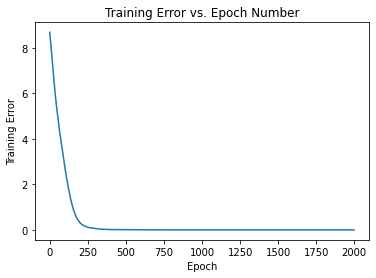

In [9]:
# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(2000), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')